In [2]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json


with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [12]:
rap_urls = []
rap_albums_checked = []
rap_albums_used = []

rock_urls = []
rock_albums_checked = []
rock_albums_used = []

country_albums_used = []
country_albums_checked = []
country_urls = []

have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:country', type='track', limit=50,offset=i)
    else:
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(country_albums_used) == 350:
            have_enough_pics = True
            break
        if item["album"]["id"] not in country_albums_checked and item["album"]["type"] == "album":
            country_albums_checked.append(item["album"]["id"])
            artist_id = item["album"]["artists"][0]["id"]
            curr_artist = spotify.artist(artist_id)
            all_genres = curr_artist["genres"]
            found = False
            for curr_genre in all_genres:
                if "country" in curr_genre:
                    found = True
                    
            if found:
                country_albums_used.append(item["album"]["id"])
                country_urls.append(item["album"]["images"][1]["url"])
            else:
                print(all_genres)
                print(curr_artist["name"])
                
have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:rap', type='track', limit=50,offset=i)
    else:
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(rap_albums_used) == 350:
            have_enough_pics = True
            break
        try:
            if item["album"]["id"] not in rap_albums_checked and item["album"]["type"] == "album":
                rap_albums_checked.append(item["album"]["id"])
                artist_id = item["album"]["artists"][0]["id"]
                curr_artist = spotify.artist(artist_id)
                all_genres = curr_artist["genres"]
                found = False
                for curr_genre in all_genres:
                    if "rap" in curr_genre or "hip hop" in curr_genre:
                        found = True
                        
                if found:
                    rap_albums_used.append(item["album"]["id"])
                    rap_urls.append(item["album"]["images"][1]["url"])
                else:
                    print(all_genres)
                    print(curr_artist["name"])
        except:
            print("Did not work???")
            print(item)
                
have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:rock', type='track', limit=50,offset=i)
    else:
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(rock_albums_used) == 350:
            have_enough_pics = True
            break
        if item["album"]["id"] not in rock_albums_checked and item["album"]["type"] == "album":
            rock_albums_checked.append(item["album"]["id"])
            artist_id = item["album"]["artists"][0]["id"]
            curr_artist = spotify.artist(artist_id)
            all_genres = curr_artist["genres"]
            found = False
            for curr_genre in all_genres:
                if "rock" in curr_genre:
                    found = True
                    
            if found:
                rock_albums_used.append(item["album"]["id"])
                rock_urls.append(item["album"]["images"][1]["url"])
            else:
                print(all_genres)
                print(curr_artist["name"])
                '''
have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:pop', type='track', limit=50,offset=i)
    else:have_enough_pics = False
for i in range(0,1000,50):
    if not have_enough_pics:
        track_results = spotify.search(q='genre:pop', type='track', limit=50,offset=i)
    else:
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(pop_albums_used) == 350:
            have_enough_pics = True
            break
        if item["album"]["id"] not in pop_albums_checked and item["album"]["type"] == "album":
            pop_albums_checked.append(item["album"]["id"])
            artist_id = item["album"]["artists"][0]["id"]
            curr_artist = spotify.artist(artist_id)
            all_genres = curr_artist["genres"]
            found = False
            for curr_genre in all_genres:
                if "pop" in curr_genre:
                    found = True
                    
            if found:
                pop_albums_used.append(item["album"]["id"])
                pop_urls.append(item["album"]["images"][1]["url"])
            else:
                print(all_genres)
                print(curr_artist["name"])
        break
    for i, item in enumerate(track_results["tracks"]["items"]):
        if len(pop_albums_used) == 350:
            have_enough_pics = True
            break
        if item["album"]["id"] not in pop_albums_checked and item["album"]["type"] == "album":
            pop_albums_checked.append(item["album"]["id"])
            artist_id = item["album"]["artists"][0]["id"]
            curr_artist = spotify.artist(artist_id)
            all_genres = curr_artist["genres"]
            found = False
            for curr_genre in all_genres:
                if "pop" in curr_genre:
                    found = True
                    
            if found:
                pop_albums_used.append(item["album"]["id"])
                pop_urls.append(item["album"]["images"][1]["url"])
            else:
                print(all_genres)
                print(curr_artist["name"])
'''


[]
Various Artists
[]
Various Artists
[]
Various Artists


In [13]:
print(len(country_albums_used))
print(len(country_urls))


print(len(rap_albums_used))
print(len(rap_urls))

print(len(rock_albums_used))
print(len(rock_urls))

350
350
350
350
400
400


In [9]:
for i, url in enumerate(country_urls):
    if i >= 300:
        try:
            rock_urls.pop(i)
            rock_albums_used.pop(i)
        except:
            pass
        country_urls.pop(i)
        country_albums_used.pop(i)
        rap_urls.pop(i)
        rap_albums_used.pop(i)

In [10]:
print(len(country_albums_used))
print(len(country_urls))


print(len(rap_albums_used))
print(len(rap_urls))

print(len(rock_albums_used))
print(len(rock_urls))

325
325
325
325
309
309


In [11]:
for i, url in enumerate(country_urls):
    if url in rap_urls or url in rock_urls:
        rock_urls.pop(i)
        rock_albums_used.pop(i)

for i, url in enumerate(rap_urls):
    if url in country_urls or url in rock_urls:
        rap_urls.pop(i)
        rap_albums_used.pop(i)

for i, url in enumerate(rock_urls):
    if url in country_urls or url in rap_urls:
        rock_urls.pop(i)
        rock_albums_used.pop(i)


IndexError: pop index out of range

In [5]:
# Verifying that we have same amount of urls as ID's
print(len(country_albums_used))
print(len(country_urls))


print(len(rap_albums_used))
print(len(rap_urls))

print(len(rock_albums_used))
print(len(rock_urls))


350
350
337
337
316
316
0
0


In [15]:
from fastdownload import download_url
from fastai.vision.all import *
genres = ["country", "rap", "rock", "pop"]
path = Path("album_imgs")

dest = (path/genres[0])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=country_urls)

dest = (path/genres[1])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=rap_urls)

dest = (path/genres[2])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=rock_urls)

dest = (path/genres[3])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=pop_urls)

In [16]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # This line says that Images are the input and Categories are the output
    get_items=get_image_files, # using the provided path, this collects image files in that path
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # splits data
    get_y=parent_label, # classifies each picture by the folder name in which it is in
    item_tfms=[Resize(192, method='squish')] # resize image to be uniform (does not crop)
).dataloaders(path, bs=5) # batch size of 500, since we have about 500 of each image

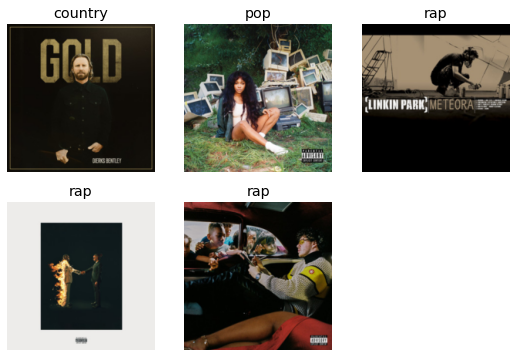

In [19]:
dls.show_batch()

In [20]:
from fastbook import *
from fastai.vision.widgets import *



In [21]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

In [20]:
# try cnn learner
# learn2 = cnn_learner(dls, arch=resnet18, metrics=accuracy)
# learn.fine_tune(3)

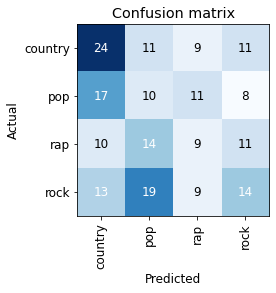

In [22]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [23]:
interp.print_classification_report()

              precision    recall  f1-score   support

     country       0.38      0.44      0.40        55
         pop       0.19      0.22      0.20        46
         rap       0.24      0.20      0.22        44
        rock       0.32      0.25      0.28        55

    accuracy                           0.28       200
   macro avg       0.28      0.28      0.28       200
weighted avg       0.29      0.28      0.28       200



In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [25]:
for category in dls.vocab:
    for idx in cleaner.delete():
        try: 
            cleaner.fns[idx].unlink()
        except:
            pass
        cleaner.delete

In [26]:
interp.print_classification_report()

              precision    recall  f1-score   support

     country       0.38      0.44      0.40        55
         pop       0.19      0.22      0.20        46
         rap       0.24      0.20      0.22        44
        rock       0.32      0.25      0.28        55

    accuracy                           0.28       200
   macro avg       0.28      0.28      0.28       200
weighted avg       0.29      0.28      0.28       200



In [ ]:
learn.export("model3.pkl")